In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Data Preparation

In [139]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [140]:
df.shape

(200, 5)

In [141]:
df.drop(('Unnamed: 0'),axis=1,inplace=True)

In [142]:
df
X = df[["TV","radio","newspaper"]].values
y = df.sales.values


In [143]:
from sklearn.linear_model import LinearRegression


In [144]:
regr = LinearRegression().fit(X,y)
print(f"r2: {regr.score(X,y)}")
print(f"coefficients: {regr.coef_}")
print(f"intercept: {regr.intercept_}")


r2: 0.8972106381789522
coefficients: [ 0.04576465  0.18853002 -0.00103749]
intercept: 2.938889369459412


## Individual Contributions

### Using Scipy.Stats

In [97]:
TV = df.TV.values
Radio = df.radio.values
Newspaper = df.newspaper.values
y = df.sales.values

In [98]:
# TV
slopet, interceptt, r, p, std_error = stats.linregress(TV, y)

def TV_model(x):
    return slopet*x + interceptt

y_TV_sales = list(map(TV_model,TV))
print(f"TV r-square: {r}")

# Radio
slope, intercept, r, p, std_error = stats.linregress(Radio, y)

def Radio_model(x):
    return slope*x + intercept

y_Radio_sales = list(map(Radio_model,Radio))

print(f"Radio r-square: {r}")
# Newspaper
slope, intercept, r, p, std_error = stats.linregress(Newspaper, y)

def Newspaper_model(x):
    return slope*x + intercept

y_Newspaper_sales = list(map(Newspaper_model,Newspaper))
print(f"Newspaper r-square: {r}")

TV r-square: 0.7822244248616065
Radio r-square: 0.5762225745710553
Newspaper r-square: 0.22829902637616536


### Plotting

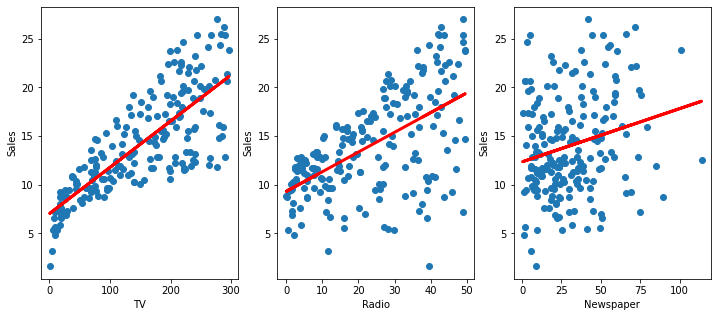

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.scatter(data=df,x='TV',y='sales')
plt.plot(TV,y_TV_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("TV")
plt.subplot(1,3,2)
plt.scatter(data=df,x='radio',y='sales',marker='o')
plt.plot(Radio,y_Radio_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("Radio")
plt.subplot(1,3,3)
plt.scatter(data=df,x='newspaper',y='sales')
plt.plot(Newspaper,y_Newspaper_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("Newspaper")
plt.show()

## Using polynomial regression

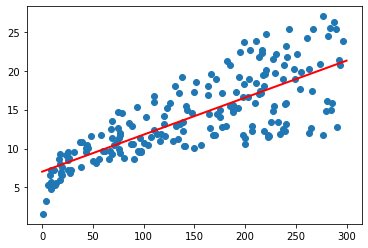

In [87]:
TV_model1 = np.poly1d(np.polyfit(TV,y,1))
TVx = np.linspace(0,300,200)
plt.scatter(data=df,x='TV',y='sales')
plt.plot(TVx, TV_model1(TVx), c='r',lw=2)
plt.show()

In [89]:
from sklearn.metrics import r2_score
r2_score(y,TV_model(TV))

0.611875050850071

### Test

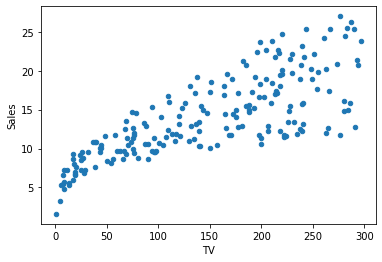

In [82]:
df.plot(x='TV',y='sales',kind='scatter',xlabel='TV',ylabel='Sales')
plt.show()

In [83]:
type(df[['TV']])

pandas.core.frame.DataFrame

In [84]:
df.groupby(by='TV').mean()

,radio,newspaper,sales
TV,,,
0.7,39.6,8.7,1.6
4.1,11.6,5.7,3.2
5.4,29.9,9.4,5.3
7.3,28.1,41.4,5.5
7.8,38.9,50.6,6.6
...,...,...,...
289.7,42.3,51.2,25.4
290.7,4.1,8.5,12.8
292.9,28.3,43.2,21.4


### Test

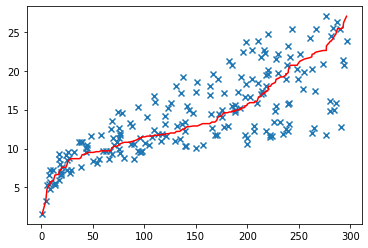

In [138]:
plt.scatter(x=df.TV, y=df.sales, marker='x')
plt.plot(sorted(df.TV),sorted(df.sales),'r')
plt.show()

In [86]:
np.corrcoef(df.TV, df.sales, rowvar=False)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

## Linear Regression - TV & Sales

In [136]:
from sklearn.linear_model import LinearRegression

# X = np.reshape(df.TV.values, (-1, 1))
X = df[["TV"]].values
X.shape
y = df.sales.values
regr = LinearRegression()
regr.fit(X,y)
print(f"R2 Coefficient: {regr.score(X,y)}")
print(f"Intercept: {regr.intercept_}")
print(f"Gradient: {regr.coef_}")

def model(x):
    return regr.coef_ * x + regr.intercept_

y_TV = list(map(model, X))


R2 Coefficient: 0.611875050850071
Intercept: 7.032593549127695
Gradient: [0.04753664]


In [137]:
# Alternatively
from sklearn.metrics import r2_score
r2_score(y, y_TV)

0.611875050850071

### Feature Importance | P value test

In [147]:
for x in df:
    if pd.api.types.is_numeric_dtype(df[x]):
        r, p = stats.pearsonr(df.sales.values, df[x])
        print(f"{x}: r = {r:.4f}, p = {p:.5f}")

TV: r = 0.7822, p = 0.00000
radio: r = 0.5762, p = 0.00000
newspaper: r = 0.2283, p = 0.00115
sales: r = 1.0000, p = 0.00000
